In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(x_train, _),(x_test,_) = mnist.load_data()

In [12]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [13]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

In [15]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [16]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Using Conv Layer

In [17]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [18]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [19]:
noise_factore = 0.5

X_train_noisy = X_train+noise_factore*np.random.normal(0.0, 1.0, X_train.shape)

X_test_noisy = X_test+noise_factore*np.random.normal(0.0,1.0, X_test.shape)

# Clipping

In [20]:
X_train_noisy = np.clip(X_train_noisy,0.1,1.)
X_test_noisy = np.clip(X_test_noisy,0.1,1.)

In [21]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


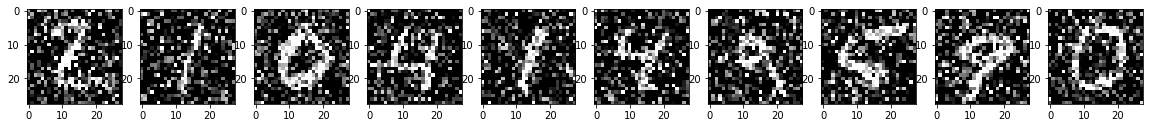

In [22]:
n = 10

plt.figure(figsize=(20,2))
for i in range (1, n+1):
    sp = plt.subplot(1,n,i)
    plt.imshow(X_test_noisy[i].reshape(28,28))
    
    plt.gray()
plt.show()

# Model AutoEncoder

In [26]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

In [28]:
input_img  = Input(shape=(28,28,1))
x = Conv2D(32,(3,3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2,2))(x)

x = Conv2D(32,(3,3), activation='relu', padding='same')(x)

encoded = MaxPool2D((2,2))(x)


x = Conv2D(32,(3,3), activation='relu', padding='same')(encoded)

x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),padding='same', activation='sigmoid')(x)



In [37]:
autoencoder = Model(input_img,decoded)

autoencoder.compile(loss="binary_crossentropy",
                   optimizer = 'adadelta',
                   metrics =['accuracy'])

In [38]:
autoencoder.fit(X_train_noisy,X_train,
               validation_data=(X_test_noisy, X_test),
               verbose=2,
               batch_size=128,
               shuffle=True,
               epochs=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 127s - loss: 0.1207 - accuracy: 0.8097 - val_loss: 0.1176 - val_accuracy: 0.8063


# Prediction 

In [39]:
de_noised_image = autoencoder.predict(X_test_noisy[:10]) 

# Plottin/g

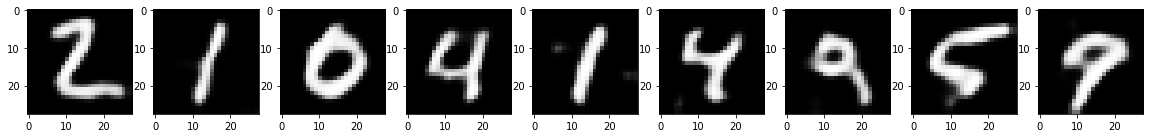

In [42]:
n = 9
plt.figure(figsize=(20,2))
for i in range(1, n+1):
    plt.subplot(1,n,i)
    plt.imshow(de_noised_image[i].reshape(28,28))
    plt.gray()
plt.show()